In [1]:
!jt -l

^C


In [2]:
#!jt -t chesterish
#!jt -t gruvboxl -T -N -kl
!jt -t chesterish -f fira -fs 10 -nf ptsans -nfs 11 -N -kl -cursw 2 -cursc r -cellw 95% -T

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [223]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [69]:
newdf= application_df.sample(n = 35000, replace = True)

In [70]:
newdf.shape

(35000, 12)

In [224]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=['EIN','NAME'], inplace=True)

In [203]:
pd.options.display.float_format = '{:.5f}'.format

In [204]:
application_df.describe()

,STATUS,ASK_AMT,IS_SUCCESSFUL
count,34299.00000,34299.00000,34299.00000
mean,0.99985,2769198.68206,0.53241
std,0.01207,87130452.43595,0.49896
min,0.00000,5000.00000,0.00000
25%,1.00000,5000.00000,0.00000
50%,1.00000,5000.00000,1.00000
75%,1.00000,7742.00000,1.00000
max,1.00000,8597806340.00000,1.00000


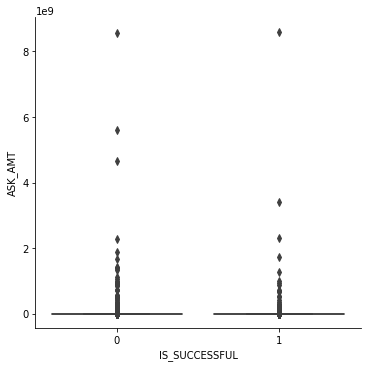

In [205]:
#boxplot = application_df.boxplot(column=['ASK_AMT'],figsize=(8, 6), showmeans=True)
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
#application_df.boxplot( column =['ASK_AMT'], grid = False)
import seaborn as sns

sns.catplot(x="IS_SUCCESSFUL", y="ASK_AMT", data=application_df, kind="box")


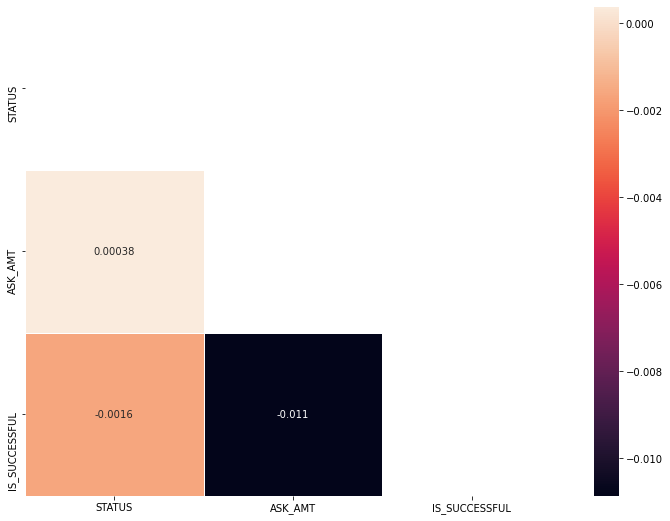

In [206]:
plt.figure(figsize=(12, 9))
matrix = np.triu(application_df.corr())
sns.heatmap(application_df.corr(), annot=True,
            linewidth=.8, mask=matrix, cmap="rocket");

In [225]:
# Determine the number of unique values in each column.
# Generate our categorical variable list
application_unique = application_df.dtypes.index.tolist()
application_df[application_unique].nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [77]:
from collections import Counter

In [219]:
def detect_outliers(columns):
    outlier_indices = []

    for column in columns:
        # 1st quartile
        Q1 = np.percentile(application_df[column], 25)
        # 3st quartile
        Q3 = np.percentile(application_df[column], 75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = application_df[(application_df[column] < Q1 - outlier_step)
                              | (application_df[column] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1.5)

    return multiple_outliers

In [224]:
print("number of outliers detected --> ",
      len(application_df.loc[detect_outliers(application_df[['ASK_AMT']])]))

number of outliers detected -->  0


In [41]:
Q1 = np.percentile(newdf['ASK_AMT'], 25)
# 3st quartile
Q3 = np.percentile(newdf['ASK_AMT'], 75)
# IQR
IQR = Q3 - Q1
# Outlier Step
outlier_step = IQR * 1.5
# detect outlier and their indices
outlier_list_col = newdf[(newdf['ASK_AMT'] < Q1 - outlier_step)| (newdf['ASK_AMT'] > Q3 + outlier_step)].index
outlier_list_col_ = newdf[(newdf['ASK_AMT'] < Q1 - outlier_step)| (newdf['ASK_AMT'] > Q3 + outlier_step)]
# store indeces
outlier_indices = []
outlier_indices.extend(outlier_list_col)
outlier_indices = Counter(outlier_indices)
len(outlier_indices)

6000

In [245]:
new_column=newdf.loc[(newdf['ASK_AMT'] < Q1 - outlier_step)| (newdf['ASK_AMT'] > Q3 + outlier_step),['ASK_AMT']]

In [19]:
newdf.loc[(newdf['ASK_AMT'] < Q1 - outlier_step)| (newdf['ASK_AMT'] > Q3 + outlier_step)]

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
33749,T5,CompanySponsored,C3000,ProductDev,Association,1,25000-99999,N,83544,1
29180,T3,Independent,C1200,Preservation,Trust,1,10M-50M,N,126669751,0
11729,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,85869,1
23707,T3,Independent,C1200,Preservation,Association,1,1-9999,N,90631,0
15569,T3,Independent,C1200,Preservation,Trust,1,25000-99999,N,491364,1
...,...,...,...,...,...,...,...,...,...,...
23855,T3,Independent,C1200,Preservation,Trust,1,1M-5M,N,1343044,1
33215,T3,CompanySponsored,C3000,ProductDev,Trust,1,25000-99999,N,23641,0
5392,T3,Independent,C4000,Preservation,Trust,1,100000-499999,N,35523,1
25127,T3,Independent,C5000,Preservation,Trust,1,10M-50M,N,4633676,0


In [23]:
outl= (application_df['ASK_AMT'] < Q1 - outlier_step)| (application_df['ASK_AMT'] > Q3 + outlier_step)

In [24]:
application_df['Outlier'] =np.where(outl, 1, 0)

In [234]:
outlier_list_col_

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
6,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1
7,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
8,T7,Independent,C1000,ProductDev,Trust,1,1-9999,N,94389,1
...,...,...,...,...,...,...,...,...,...,...
34280,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,401661,0
34281,T3,Independent,C1000,Preservation,Trust,1,1M-5M,N,56261,1
34284,T3,CompanySponsored,C1000,Preservation,Association,1,1M-5M,N,3384856,0
34289,T3,Independent,C1000,Preservation,Trust,1,25000-99999,N,20197,1


In [ ]:
df.drop(df[df['Age'] < 25].index, inplace = True)

In [20]:
newdf.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
33749,T5,CompanySponsored,C3000,ProductDev,Association,1,25000-99999,N,83544,1
5235,T8,CompanySponsored,C1000,ProductDev,Association,1,0,N,5000,0
15687,T6,Independent,C2000,ProductDev,Trust,1,0,N,5000,0
26948,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
27635,T3,Independent,C1000,Preservation,Trust,1,0,N,5000,0


In [31]:
application_df.drop(application_df[application_df['Outlier'] == 1].index, inplace = True)

In [30]:
display(application_df.loc[(application_df['Outlier']==1) & (application_df['IS_SUCCESSFUL']==1),
                    ['USE_CASE','ORGANIZATION']])

,USE_CASE,ORGANIZATION
1,Preservation,Co-operative
4,Heathcare,Trust
6,Preservation,Trust
7,Preservation,Trust
8,ProductDev,Trust
...,...,...
34250,Heathcare,Trust
34259,Preservation,Trust
34263,Preservation,Trust
34281,Preservation,Trust


In [236]:
outlier_list_col_.describe()

,STATUS,ASK_AMT,IS_SUCCESSFUL
count,8206.00000,8206.00000,8206.00000
mean,1.00000,11558388.38533,0.55143
std,0.00000,177856214.40932,0.49738
min,1.00000,11886.00000,0.00000
25%,1.00000,45368.50000,0.00000
50%,1.00000,128131.00000,1.00000
75%,1.00000,592106.00000,1.00000
max,1.00000,8597806340.00000,1.00000


In [34]:
application_df.shape

(26093, 11)

In [ ]:
application_df[application_df['ASK_AMT']]

In [208]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df.APPLICATION_TYPE.value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

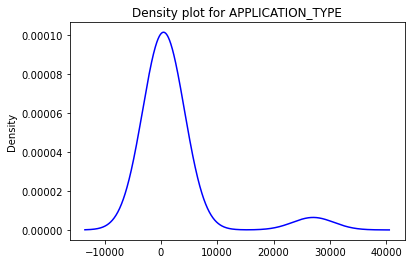

In [209]:
#application_df.APPLICATION_TYPE.plot
application_type_counts.plot.density(color='blue', legend=False)
plt.title('Density plot for APPLICATION_TYPE')
plt.show()

C:\Users\ayool\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


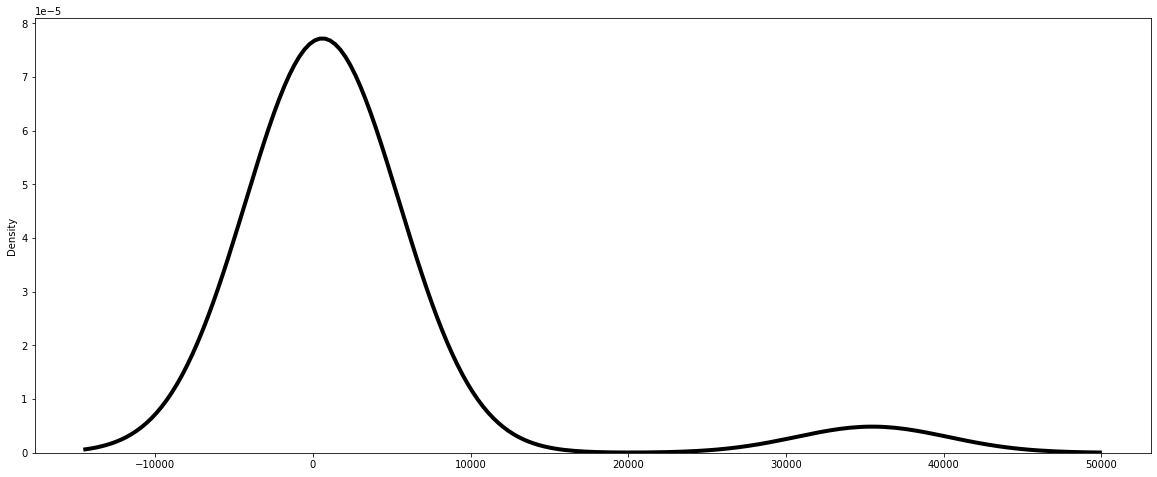

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize = (20,8)) #Specify the size of figure we want(Optional)
sb.distplot(x = application_type_counts,  bins = 10 , kde = True , hist=False,color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'black'))
plt.show()

<AxesSubplot:ylabel='Density'>

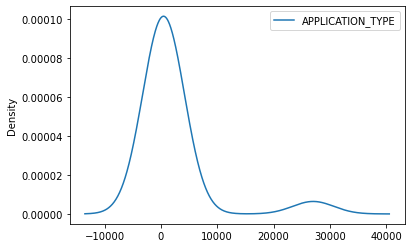

In [179]:
pd.DataFrame(application_type_counts).plot(kind='density')

C:\Users\ayool\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='APPLICATION_TYPE', ylabel='Density'>

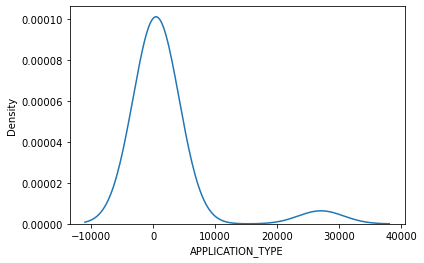

In [180]:
sns.distplot(application_type_counts, hist=False)

C:\Users\ayool\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='APPLICATION_TYPE', ylabel='Density'>

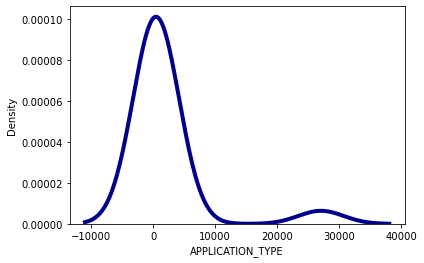

In [181]:
# Visualize the value counts of APPLICATION_TYPE
import matplotlib.pyplot as plt
%matplotlib inline
#application_type_counts.plot.density()

# application_type_counts.plot.kde(color='blue')
# plt.title('KDE-Density plot Aplication_Type')
# plt.show()



# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(application_type_counts, hist=False, kde=True, 
             bins=int(500), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [210]:
# Determine which values to replace if counts are less than 500?
replace_application = list(application_type_counts[application_type_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [226]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()

# Check the number of unique values in each column
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

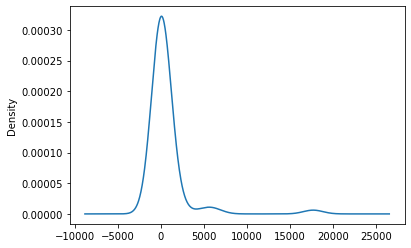

In [82]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [227]:
# Determine which values to replace if counts are less than 1000?
replace_class = list(classification_counts[classification_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [228]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
application_df[application_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION             6
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [43]:
del application_df['Outlier']

In [229]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
3,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000


In [230]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,axis=1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
1,1,108590,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
2,1,5000,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
3,1,6692,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
4,1,142590,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000


In [259]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL.values
X = application_df.drop(columns=["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,  stratify=y)

In [261]:
len(X_train_scaled[0])

51

In [267]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [268]:
X_scaler_ = scaler.fit(X_test)
X_test_scaled = X_scaler_.transform(X_test)

In [ ]:
# Create a DataFrame with the scaled data
transformed_scaled_data = pd.DataFrame(scaled_data, columns=hr_df.columns)
transformed_scaled_data.head()

In [269]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 25
hidden_nodes_layer4 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="ReLU")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="ReLU"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="ReLU"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="ReLU"))

# Second hidden layer
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))
# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 100)               5200      
_________________________________________________________________
dense_56 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_57 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_58 (Dense)             (None, 12)                312       
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 13        
Total params: 11,850
Trainable params: 11,850
Non-trainable params: 0
_________________________________________________________________


In [270]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [271]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5685 - accuracy: 0.7226
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5528 - accuracy: 0.7333
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5504 - accuracy: 0.7334
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5491 - accuracy: 0.7336
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5479 - accuracy: 0.7355
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5474 - accuracy: 0.7347
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5467 - accuracy: 0.7354
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5458 - accuracy: 0.7362
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5447 - accuracy: 0.7370
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5448 - accura

804/804 [==============================] - 1s 1ms/step - loss: 0.5338 - accuracy: 0.7411: 0s - loss: 0.5401 -  - ETA: 0s - loss: 0.5337 - accuracy: 0.
Epoch 80/100
804/804 [==============================] - 1s 972us/step - loss: 0.5332 - accuracy: 0.7417
Epoch 81/100
804/804 [==============================] - 1s 994us/step - loss: 0.5337 - accuracy: 0.7414
Epoch 82/100
804/804 [==============================] - 1s 939us/step - loss: 0.5333 - accuracy: 0.7422
Epoch 83/100
804/804 [==============================] - 1s 955us/step - loss: 0.5344 - accuracy: 0.7411
Epoch 84/100
804/804 [==============================] - 1s 939us/step - loss: 0.5340 - accuracy: 0.74190s - loss: 0.532
Epoch 85/100
804/804 [==============================] - 1s 928us/step - loss: 0.5332 - accuracy: 0.74230s - loss: 0.5
Epoch 86/100
804/804 [==============================] - 1s 949us/step - loss: 0.5329 - accuracy: 0.7427
Epoch 87/100
804/804 [==============================] - 1s 985us/step - loss: 0.5327 - accu

In [272]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5663 - accuracy: 0.7249
Loss: 0.5662658214569092, Accuracy: 0.7248979806900024


In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
import pandas as pd
import tensorflow as tf

In [266]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.708


In [40]:
# Create the SVM model
svm = SVC(kernel='linear')

In [ ]:
# Train the model
svm.fit(X_train_scaled, y_train)

In [ ]:
# Evaluate the model
y_pred = svm.predict(X_test_scaled)
print(f" SVM model accuracy: {accuracy_score(y_test,y_pred):.3f}")